In [1]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math
import time
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

In [2]:
y=pd.read_csv('allstate_labels_2007.csv',low_memory=False)
y=y['loan_status']
X=pd.read_csv('allstate_filtered_loans_2007.csv',low_memory=False)

In [3]:
X,y=shuffle(X,y,random_state=0)
X_train_origin,X_test,y_train_origin,y_test=train_test_split(X,y,random_state=5,test_size=0.2)
X_train=X_train_origin
y_train=y_train_origin

In [7]:
smt = SMOTETomek(1)
X_train,y_train = smt.fit_resample(X_train_origin, y_train_origin)

#FP,False Positive Rate= (#Untrustable be prodicted as trustable)/(# Untrustable)
#label of untrustable is 0 

In [8]:
train_size=list(range(1,11))
train_size[:]=[x/10 for x in train_size]
errorate_train=[]
errorate_test=[]
FP_train=[]
FP_test=[]
train_time=[]
for n in train_size:
    X_train,y_train=shuffle(X_train,y_train,random_state=0)
    X_train_sub=X_train[:int(len(X_train)*n)]
    y_train_sub=y_train[:int(len(y_train)*n)]
    time_start=time.clock()
    knn=KNeighborsClassifier(n_neighbors=int(math.sqrt(len(X_train_sub)/2)))
    knn.fit(X_train_sub,y_train_sub)
    y_train_sub_predict=knn.predict(X_train_sub)
    y_test_predict=knn.predict(X_test)
    errorate_train.append(1-accuracy_score(y_train_sub,y_train_sub_predict))
    errorate_test.append(1-accuracy_score(y_test,y_test_predict))
    error_train=y_train_sub_predict-y_train_sub
    FP_train.append(Counter(error_train)[1]/Counter(y_train_sub)[0])
    error_test=y_test_predict-y_test
    FP_test.append(Counter(error_test)[1]/Counter(y_test)[0])
    train_time.append(time.clock()-time_start)
    

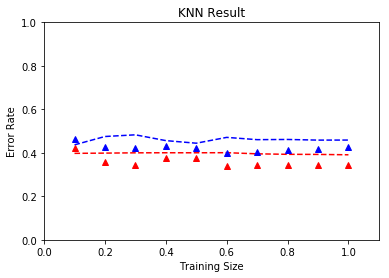

In [12]:
plt.plot(train_size,errorate_train,'r--',train_size,errorate_test,'b--',train_size,FP_train, 'r^', train_size,FP_test, 'b^')
plt.axis([0,1.1,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Training Size')
plt.title('KNN Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_KNN_Error.png')

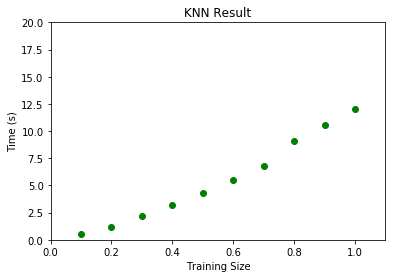

In [10]:
plt.plot(train_size,train_time,'go')
plt.axis([0,1.1,0,20])
plt.ylabel('Time (s)')
plt.xlabel('Training Size')
plt.title('KNN Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_KNN_T.png')

In [11]:
print(errorate_test[-1],FP_test[-1],errorate_train[-1],FP_train[-1])

0.45873221216041393 0.42594296228150874 0.3909689860196047 0.3423188172906958


In [12]:
33226/5423

6.126867047759543

In [4]:
from imblearn.under_sampling import RandomUnderSampler
res=RandomUnderSampler()
X_res,y_res=res.fit_resample(X_train_origin, y_train_origin)

In [5]:
    knn=KNeighborsClassifier(n_neighbors=int(math.sqrt(len(X_res)/2)))
    knn.fit(X_res,y_res)
    errorate_train_res=1-accuracy_score(y_res,knn.predict(X_res))
    errorate_test_res=1-accuracy_score(y_test,knn.predict(X_test))
    error_train=knn.predict(X_res)-y_res
    FP_train_res=Counter(error_train)[1]/Counter(y_res)[0]
    error_test=knn.predict(X_test)-y_test
    FP_test_res=Counter(error_test)[1]/Counter(y_test)[0]

In [6]:
print(errorate_test_res,FP_test_res,errorate_train_res,FP_train_res)

0.44294954721862867 0.4609015639374425 0.41374538745387457 0.4310424354243542
